Step 1: Linear Kernel (One-vs-Rest)


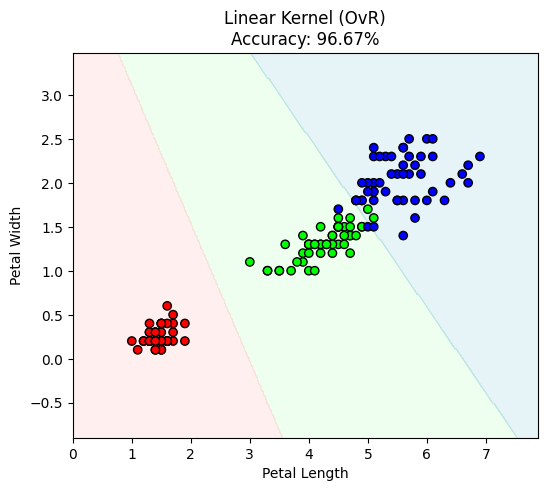

Step 2: Linear Kernel (One-vs-One)


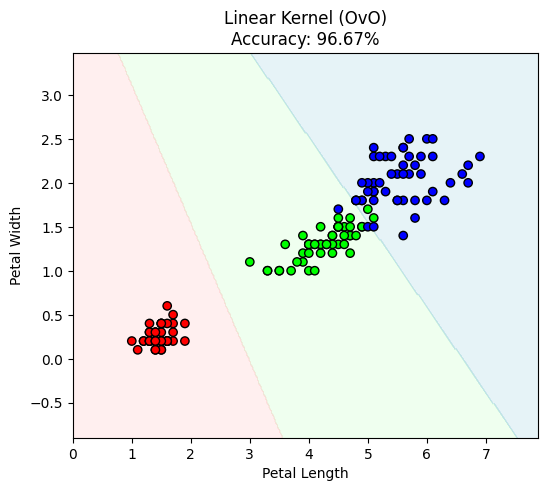

Step 3: RBF Kernel (One-vs-Rest)


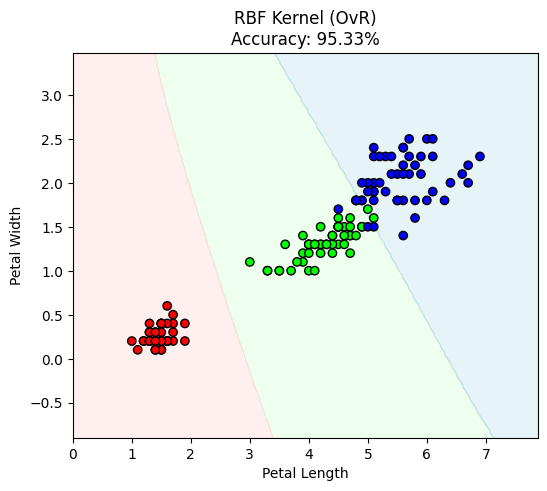

Step 4: Polynomial Kernel (Degree=3, One-vs-Rest)


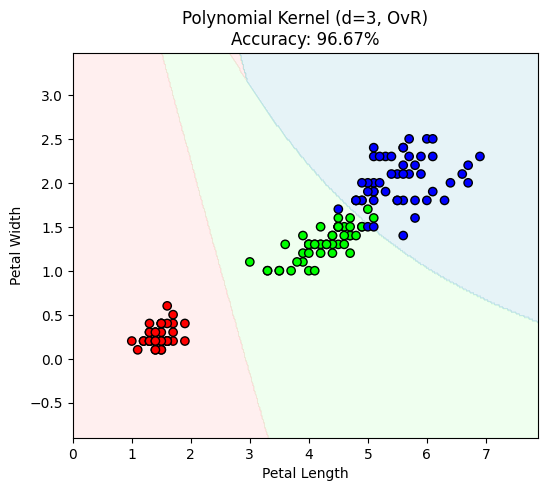

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, title):

    x_range = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02)
    y_range = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02)
    grid_x, grid_y = np.meshgrid(x_range, y_range)
    
    predictions = model.predict(np.c_[grid_x.ravel(), grid_y.ravel()]).reshape(grid_x.shape)
    predictions_on_train = model.predict(X)
    model_accuracy = accuracy_score(y, predictions_on_train)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(grid_x, grid_y, predictions, alpha=0.3, cmap=ListedColormap(['#ffcccb', '#ccffcc', '#add8e6']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#ff0000', '#00ff00', '#0000ff']))
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(f"{title}\nAccuracy: {model_accuracy * 100:.2f}%")
    plt.show()

iris_data = datasets.load_iris()
features = iris_data.data[:, [2, 3]] 
labels = iris_data.target

# Step 1: Linear Kernel (One-vs-Rest)
print("Step 1: Linear Kernel (One-vs-Rest)")
svm_linear_ovr = SVC(kernel='linear', decision_function_shape='ovr')
svm_linear_ovr.fit(features, labels)
plot_decision_boundaries(features, labels, svm_linear_ovr, 'Linear Kernel (OvR)')

# Step 2: Linear Kernel (One-vs-One)
print("Step 2: Linear Kernel (One-vs-One)")
svm_linear_ovo = SVC(kernel='linear', decision_function_shape='ovo')
svm_linear_ovo.fit(features, labels)
plot_decision_boundaries(features, labels, svm_linear_ovo, 'Linear Kernel (OvO)')

# Step 3: RBF Kernel (One-vs-Rest)
print("Step 3: RBF Kernel (One-vs-Rest)")
svm_rbf_ovr = SVC(kernel='rbf', decision_function_shape='ovr')
svm_rbf_ovr.fit(features, labels)
plot_decision_boundaries(features, labels, svm_rbf_ovr, 'RBF Kernel (OvR)')

# Step 4: Polynomial Kernel (Degree=3, One-vs-Rest)
print("Step 4: Polynomial Kernel (Degree=3, One-vs-Rest)")
svm_poly_d3_ovr = SVC(kernel='poly', degree=3, decision_function_shape='ovr')
svm_poly_d3_ovr.fit(features, labels)
plot_decision_boundaries(features, labels, svm_poly_d3_ovr, 'Polynomial Kernel (d=3, OvR)')